# Лабораторная работа №6

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.seterr(over='ignore', divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

Посмотрим на набор данных

In [72]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Найдем пропущенные значения

In [74]:
cols_with_zero_as_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_as_nan:
    df[col] = df[col].replace(0, np.nan)
df = df.dropna()
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
stats = df.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Построим гистограммы признаков

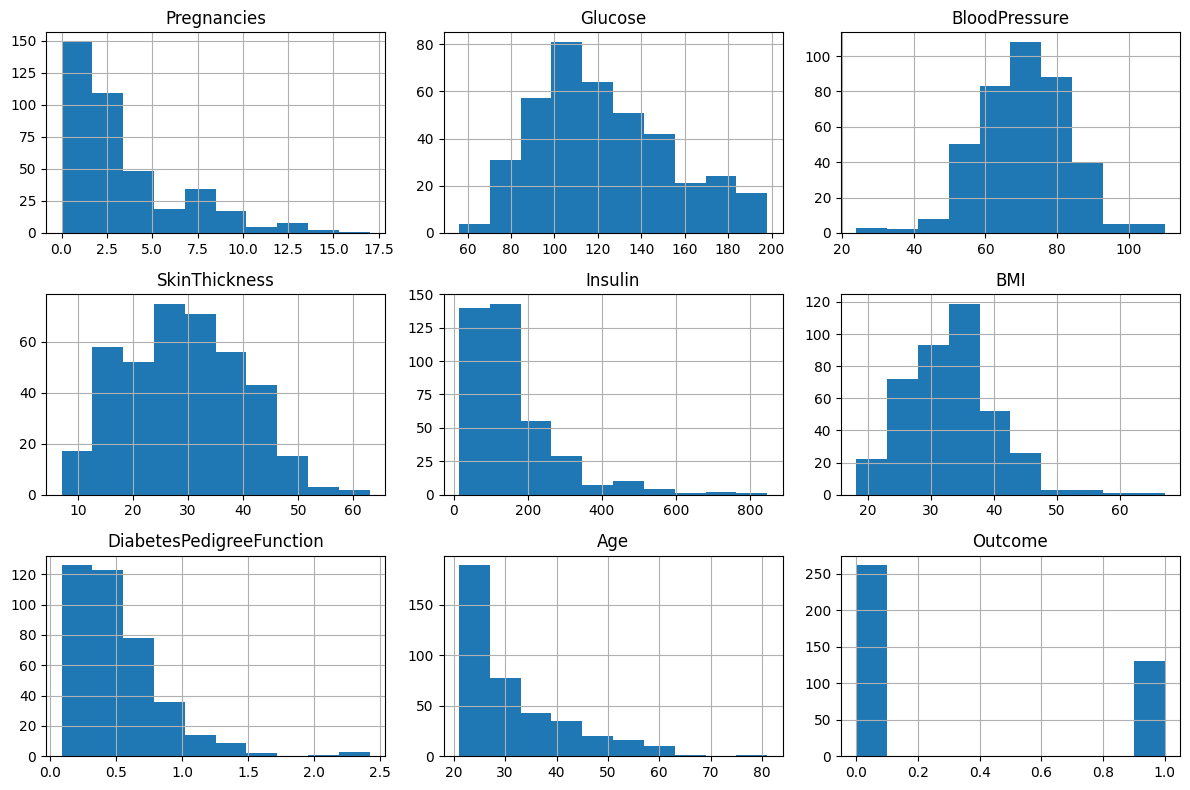

In [76]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


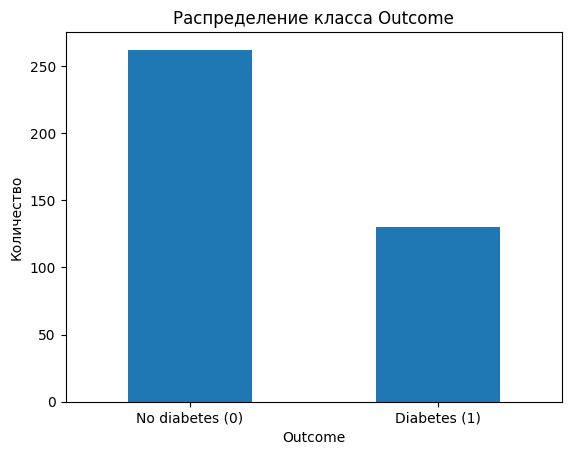

In [77]:
df["Outcome"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["No diabetes (0)", "Diabetes (1)"], rotation=0)
plt.ylabel("Количество")
plt.title("Распределение класса Outcome")
plt.show()


Разделим данные на обучающую и тестовую выборки, нормализуем признаки

In [78]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_min = X.min()
X_max = X.max()

X_range = X_max - X_min
X_range[X_range == 0] = 1

X_norm = (X - X_min) / X_range

X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000
4,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000
6,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333
8,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333
13,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_norm,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 8), (79, 8), (313,), (79,))

In [80]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
69,0.235294,0.633803,0.709302,0.357143,0.103365,0.218814,0.044540,0.100000
588,0.176471,0.845070,0.720930,0.357143,0.170673,0.308793,0.457816,0.516667
282,0.411765,0.542254,0.744186,0.142857,0.169471,0.290389,0.075803,0.266667
459,0.529412,0.549296,0.581395,0.464286,0.055288,0.157464,0.160600,1.000000
530,0.117647,0.464789,0.418605,0.196429,0.110577,0.237219,0.270664,0.016667


In [81]:
X_train_np = X_train.to_numpy(dtype=np.float64)
y_train_np = y_train.to_numpy(dtype=np.float64).reshape(-1, 1)

X_test_np = X_test.to_numpy(dtype=np.float64)
y_test_np = y_test.to_numpy(dtype=np.float64)

Логистическая регрессия моделирует вероятность:

$$
\hat{y} = P(y = 1 \mid x)
$$

Линейная модель:

$$
z = w^\top x + b
$$

Сигмоида:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Предсказание:

$$
\hat{y} = \sigma(z)
$$

Функция потерь:

$$
L(w, b) = -\frac{1}{m} \sum_{i=1}^m
\left[
y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)
\right]
$$

**Градиентный спуск (GD):**

$$
w := w - \alpha \cdot \frac{\partial L}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial L}{\partial b}
$$
где $\alpha$ — learning rate.

**Метод Ньютона**

Градиент:

$$
g = \frac{1}{m} X^\top (\hat{y} - y)
$$

Определяем диагональную матрицу:

$$
R_i = \hat{y}_i (1 - \hat{y}_i)
$$

$$
R = \mathrm{diag}(R_1, \dots, R_m)
$$

Тогда:

$$
H = \frac{1}{m} X^\top R X
$$

Шаг метода Ньютона:

$$
w := w - H^{-1} g
$$

$$
p = \sigma(w^\top x + b)
$$

$$
\hat{y} =
\begin{cases}
1, & p \ge 0.5 \\
0, & p < 0.5
\end{cases}
$$


In [82]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, optimizer="gd"):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.optimizer = optimizer
        self.w = None
        self.b = None
        self.loss_history = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _log_loss(self, y, y_pred):
        m = y.shape[0]
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return - (1 / m) * np.sum(
            y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
        )

    def fit(self, X, y):
        X = X.astype(np.float64)
        y = y.astype(np.float64).reshape(-1, 1)

        m, n = X.shape
        self.w = np.zeros((n, 1))   # важности признаков
        self.b = 0.0                # смещение

        if self.optimizer == "gd":
            self._fit_gd(X, y, m, n)
        elif self.optimizer == "newton":
            self._fit_newton(X, y, m, n)

    def _fit_gd(self, X, y, m, n):
        for i in range(self.n_iters):
            z = X @ self.w + self.b
            y_pred = self._sigmoid(z)

            loss = self._log_loss(y, y_pred)
            self.loss_history.append(loss)

            dz = y_pred - y
            dw = (1 / m) * (X.T @ dz)
            db = (1 / m) * np.sum(dz)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def _fit_newton(self, X, y, m, n):
        for i in range(self.n_iters):
            z = X @ self.w + self.b
            y_pred = self._sigmoid(z)

            loss = self._log_loss(y, y_pred)
            self.loss_history.append(loss)

            dz = y_pred - y
            grad_w = (1 / m) * (X.T @ dz)

            R = y_pred * (1 - y_pred)                # (m, 1)
            H = (X.T * R.T) @ X / m                  # (n, n)

            H_inv = np.linalg.pinv(H)
            self.w -= H_inv @ grad_w

    def predict(self, X):
        z = X @ self.w + self.b
        proba = self._sigmoid(z)
        return (proba >= 0.5).astype(int)


In [83]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
results_lr = []

for lr in learning_rates:
    model = LogisticRegression(
        learning_rate=lr,
        n_iters=1000,
        optimizer="gd"
    )
    model.fit(X_train_np, y_train_np)

    y_pred = model.predict(X_test_np)
    acc = (y_pred.flatten() == y_test_np).mean()

    results_lr.append((lr, acc))

results_lr


[(0.0001, np.float64(0.6708860759493671)),
 (0.001, np.float64(0.6708860759493671)),
 (0.01, np.float64(0.6708860759493671)),
 (0.1, np.float64(0.8481012658227848))]

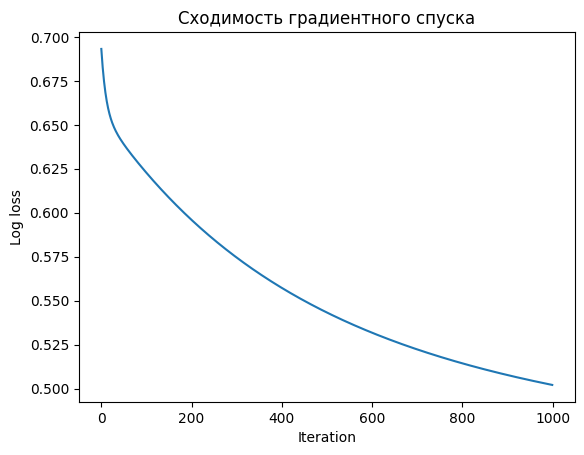

In [84]:
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log loss")
plt.title("Сходимость градиентного спуска")
plt.show()

In [85]:
iteration_counts = [0, 1, 2, 5, 10]
results_iters = []

for n_iter in iteration_counts:
    model = LogisticRegression(
        learning_rate=0.01,
        n_iters=n_iter,
        optimizer="gd"
    )
    model.fit(X_train_np, y_train_np)

    y_pred = model.predict(X_test_np)
    acc = (y_pred.flatten() == y_test_np).mean()

    results_iters.append((n_iter, acc))

results_iters


[(0, np.float64(0.3291139240506329)),
 (1, np.float64(0.6708860759493671)),
 (2, np.float64(0.6708860759493671)),
 (5, np.float64(0.6708860759493671)),
 (10, np.float64(0.6708860759493671))]

In [86]:
optimizers = ["gd", "newton"]
results_opt = []

for opt in optimizers:
    model = LogisticRegression(
        learning_rate=0.01,
        n_iters=20,
        optimizer=opt
    )
    model.fit(X_train_np, y_train_np)

    y_pred = model.predict(X_test_np)
    acc = (y_pred.flatten() == y_test_np).mean()

    results_opt.append((opt, acc))

results_opt


[('gd', np.float64(0.6708860759493671)),
 ('newton', np.float64(0.7088607594936709))]

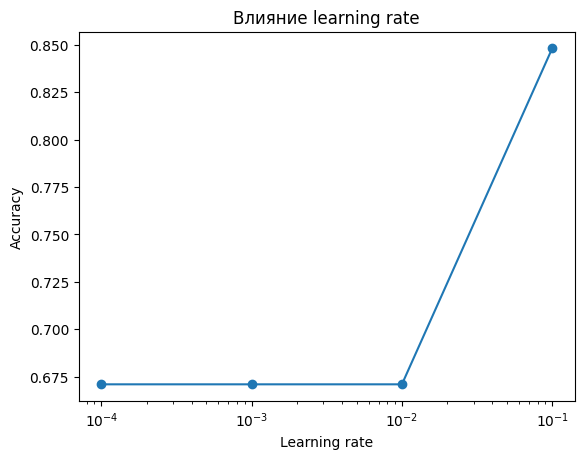

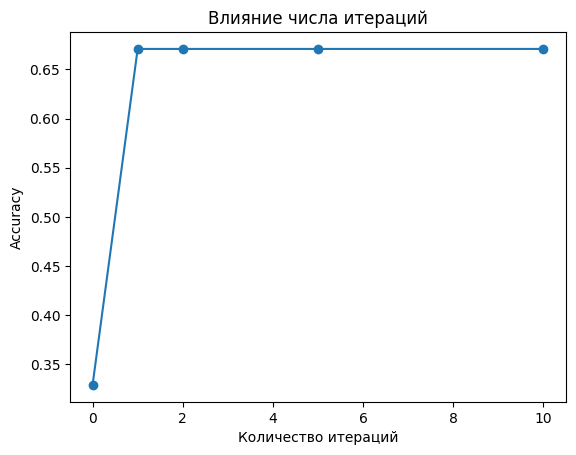

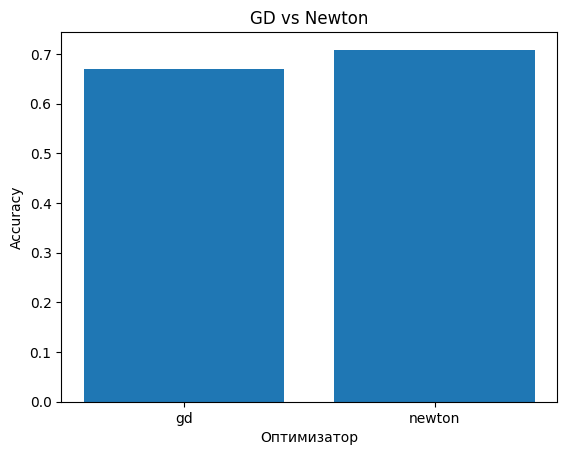

In [87]:
lrs, accs = zip(*results_lr)
plt.plot(lrs, accs, marker='o')
plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Влияние learning rate")
plt.show()

iters, accs = zip(*results_iters)
plt.plot(iters, accs, marker='o')
plt.xlabel("Количество итераций")
plt.ylabel("Accuracy")
plt.title("Влияние числа итераций")
plt.show()

opts, accs = zip(*results_opt)
plt.bar(opts, accs)
plt.xlabel("Оптимизатор")
plt.ylabel("Accuracy")
plt.title("GD vs Newton")
plt.show()

In [88]:
def compute_metrics(y_true, y_pred):
    y_true = y_true.astype(int).flatten()
    y_pred = y_pred.astype(int).flatten()

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN) if (TP+TN+FP+FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

In [89]:
results = []

for opt in optimizers:
    for lr in learning_rates:
        for n_it in iteration_counts:
            model = LogisticRegression(
                learning_rate=lr,
                n_iters=n_it,
                optimizer=opt
            )
            model.fit(X_train_np, y_train_np)

            y_pred = model.predict(X_test_np)
            acc, prec, rec, f1 = compute_metrics(y_test_np, y_pred)

            results.append({
                "optimizer": opt,
                "learning_rate": lr,
                "n_iters": n_it,
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1
            })

results_df = pd.DataFrame(results)
results_df


,optimizer,learning_rate,n_iters,accuracy,precision,recall,f1
0,gd,0.0001,0,0.329114,0.329114,1.0,0.495238
1,gd,0.0001,1,0.670886,0.000000,0.0,0.000000
2,gd,0.0001,2,0.670886,0.000000,0.0,0.000000
3,gd,0.0001,5,0.670886,0.000000,0.0,0.000000
4,gd,0.0001,10,0.670886,0.000000,0.0,0.000000
5,gd,0.0010,0,0.329114,0.329114,1.0,0.495238
6,gd,0.0010,1,0.670886,0.000000,0.0,0.000000
7,gd,0.0010,2,0.670886,0.000000,0.0,0.000000
8,gd,0.0010,5,0.670886,0.000000,0.0,0.000000
9,gd,0.0010,10,0.670886,0.000000,0.0,0.000000


In [90]:
best_row = results_df.loc[results_df["accuracy"].idxmax()]
print("Лучшая комбинация гиперпараметров (по Accuracy):")
print(best_row)

Лучшая комбинация гиперпараметров (по Accuracy):
optimizer          newton
learning_rate      0.0001
n_iters                 1
accuracy         0.721519
precision        0.590909
recall                0.5
f1               0.541667
Name: 21, dtype: object


In [91]:
best_row = results_df.loc[results_df["precision"].idxmax()]
print("Лучшая комбинация гиперпараметров (по Precision):")
print(best_row)

Лучшая комбинация гиперпараметров (по Precision):
optimizer          newton
learning_rate      0.0001
n_iters                 1
accuracy         0.721519
precision        0.590909
recall                0.5
f1               0.541667
Name: 21, dtype: object


In [92]:
best_row = results_df.loc[results_df["recall"].idxmax()]
print("Лучшая комбинация гиперпараметров (по Recall):")
print(best_row)

Лучшая комбинация гиперпараметров (по Recall):
optimizer              gd
learning_rate      0.0001
n_iters                 0
accuracy         0.329114
precision        0.329114
recall                1.0
f1               0.495238
Name: 0, dtype: object


In [93]:
best_row = results_df.loc[results_df["f1"].idxmax()]
print("Лучшая комбинация гиперпараметров (по F1):")
print(best_row)

Лучшая комбинация гиперпараметров (по F1):
optimizer          newton
learning_rate      0.0001
n_iters                 1
accuracy         0.721519
precision        0.590909
recall                0.5
f1               0.541667
Name: 21, dtype: object


In [94]:
best_by_opt = (
    results_df
    .sort_values("f1", ascending=False)
    .groupby("optimizer")
    .head(1)
    .reset_index(drop=True)
)

best_by_opt


,optimizer,learning_rate,n_iters,accuracy,precision,recall,f1
0,newton,0.0100,1,0.721519,0.590909,0.5,0.541667
1,gd,0.0001,0,0.329114,0.329114,1.0,0.495238
